In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

import dataretrieval.nwis as nwis

#import os.path

13092747 (2013-2023) Non-ref

" " 

12413370 (2010-2021) ref, 2490, 28.2

" "

13266000 ref (2017-2018)

" "

 13311000 (2012-2023) Usgs:  646619.3

" "

12305000 (2012-2023)

" "

13340600


In [2]:
site  = "13018300"
# get basic info about the site
df3 = nwis.get_record(sites=site, service='site')

print(df3.columns)
dec_lat_va=df3['dec_lat_va'][0]
dec_long_va=df3['dec_long_va'][0]
station_nm=df3['station_nm'][0]
alt_va =df3['alt_va'][0] 
drain_area_va=df3['drain_area_va'][0] 

#print(station_nm)
print(df3[['alt_va', 'alt_meth_cd', 'alt_acy_va', 'drain_area_va', 'contrib_drain_area_va']])

Index(['agency_cd', 'site_no', 'station_nm', 'site_tp_cd', 'lat_va', 'long_va',
       'dec_lat_va', 'dec_long_va', 'coord_meth_cd', 'coord_acy_cd',
       'coord_datum_cd', 'dec_coord_datum_cd', 'district_cd', 'state_cd',
       'county_cd', 'country_cd', 'land_net_ds', 'map_nm', 'map_scale_fc',
       'alt_va', 'alt_meth_cd', 'alt_acy_va', 'alt_datum_cd', 'huc_cd',
       'basin_cd', 'topo_cd', 'instruments_cd', 'construction_dt',
       'inventory_dt', 'drain_area_va', 'contrib_drain_area_va', 'tz_cd',
       'local_time_fg', 'reliability_cd', 'gw_file_cd', 'nat_aqfr_cd',
       'aqfr_cd', 'aqfr_type_cd', 'well_depth_va', 'hole_depth_va',
       'depth_src_cd', 'project_no'],
      dtype='object')
   alt_va alt_meth_cd  alt_acy_va  drain_area_va  contrib_drain_area_va
0    6750           M          10           10.6                    NaN


In [3]:
path=  r"../data_prep/prism_df_summer_" +site +".csv"  # os.path.join( r"../data_prep/prism_df_summer_",  site ,".csv" )

data=pd.read_csv( path )  

#12413370,13190500,13018300
#13266000,
#13296000 (Yankee Fork Salmon River NR Clayton ID),
#13311000, 13340600, 13092747, 12305000, 13342500, 13150430, 13016450, 13176400, 13310800, 13317660, 13192200, 12322000, 13139510,13341050

print(data)
print(data.columns)

      Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0             30  2012-06-01      0.38               3.3               10.6   
1             31  2012-06-02      0.00               6.3               13.7   
2             32  2012-06-03      0.94               6.8               14.4   
3             33  2012-06-04      0.00               7.7               15.4   
4             34  2012-06-05      0.00               8.1               17.7   
...          ...         ...       ...               ...                ...   
1088        4083  2023-08-27      3.23               9.5               16.7   
1089        4084  2023-08-28      2.50               8.4               14.7   
1090        4085  2023-08-29      0.00               7.5               15.5   
1091        4086  2023-08-30      0.00               9.0               17.4   
1092        4087  2023-08-31      0.00               6.4               12.7   

      tmax..degrees.C.  tdmean..degrees.C.  vpdmin.

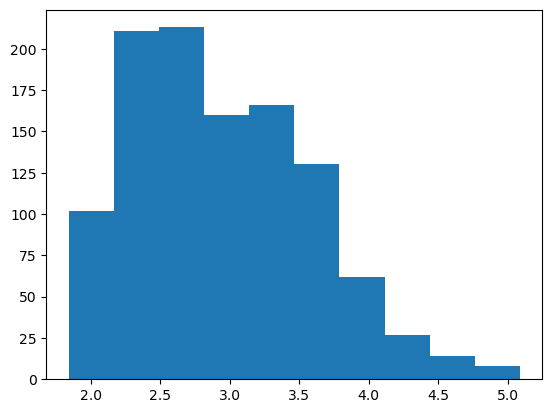

(array([660., 252., 104.,  45.,  10.,   8.,   6.,   2.,   4.,   2.]),
 array([  6.31 ,  21.879,  37.448,  53.017,  68.586,  84.155,  99.724,
        115.293, 130.862, 146.431, 162.   ]),
 <BarContainer object of 10 artists>)

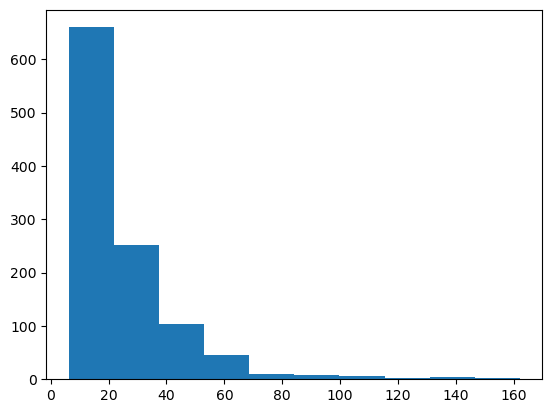

In [4]:
data['log_Q']=np.log(data['X_00060_00003'])
data
plt.hist(data['log_Q'])
plt.show()
plt.hist(data['X_00060_00003'])

Text(0, 0.5, 'Streamflow (cfs)')

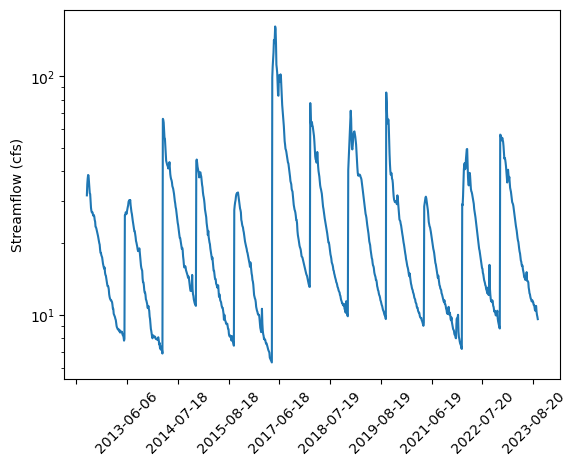

In [5]:
plt.plot(data['Date'] , data['X_00060_00003'] )
plt.yscale('log')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Streamflow (cfs)")

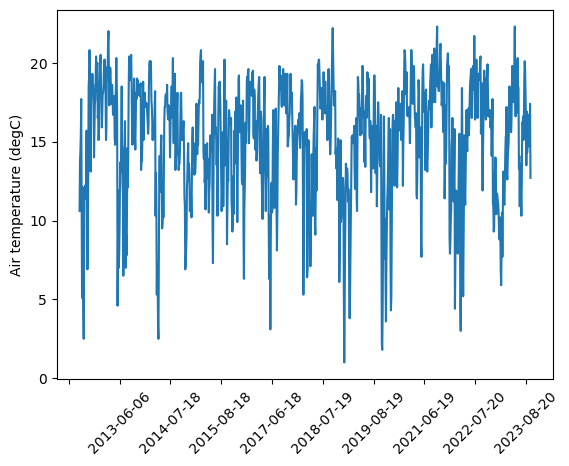

In [6]:
plt.plot(data['Date'] , data['tmean..degrees.C.'] )


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

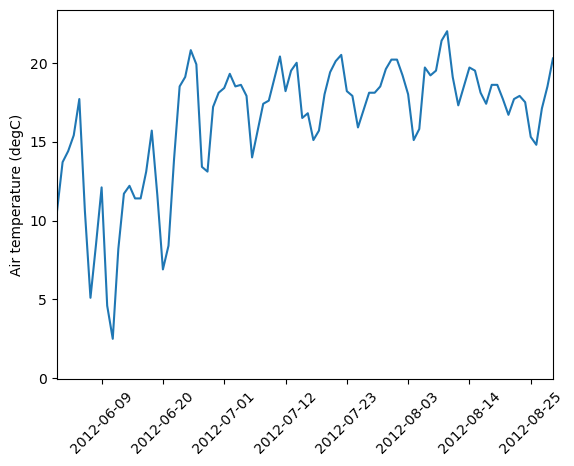

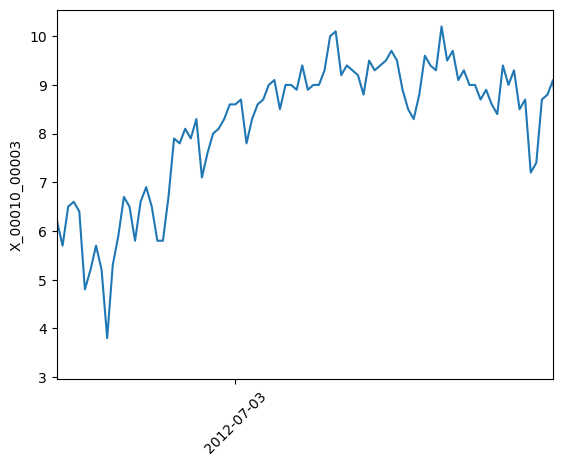

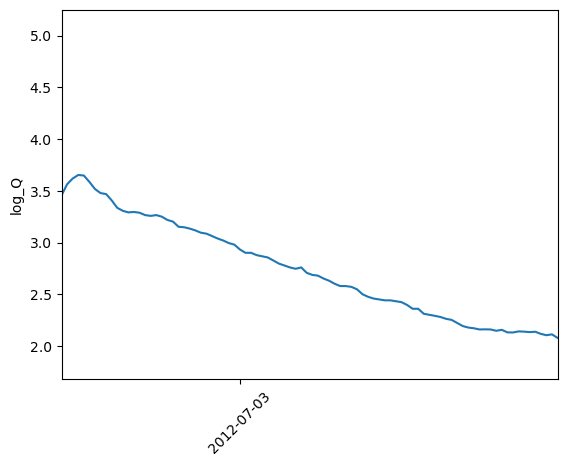

In [7]:
start=0
end=89

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

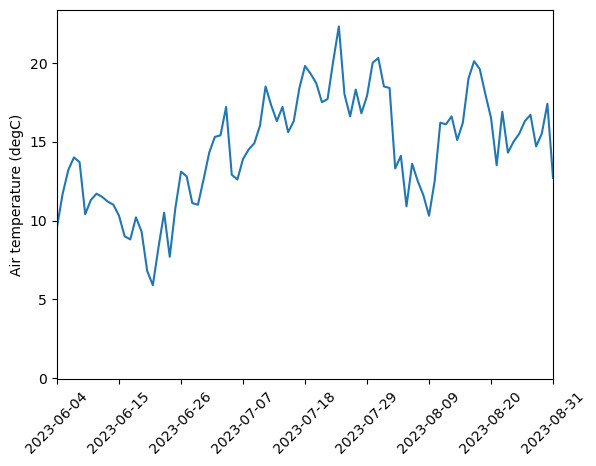

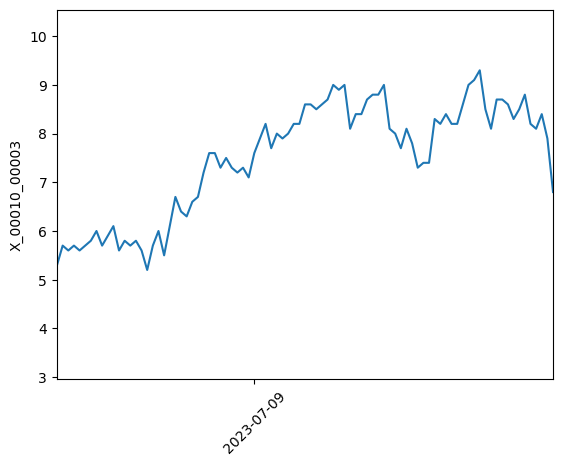

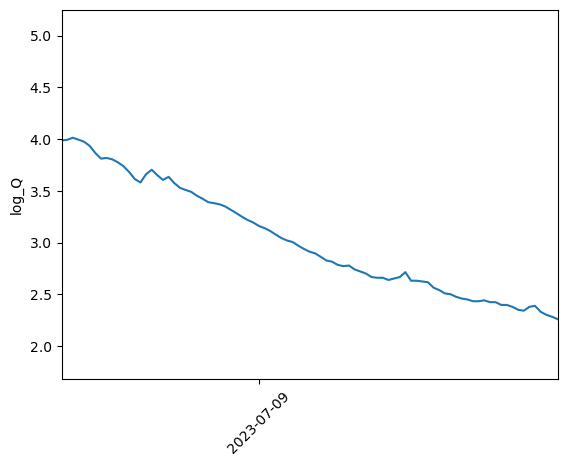

In [8]:
start=len(data)-89
end=len(data)-1

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

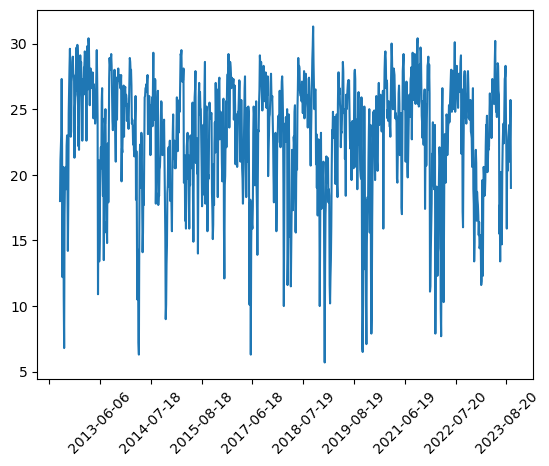

In [9]:
plt.plot(data['Date'] , data[ 'tmax..degrees.C.'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

Text(0, 0.5, 'Water temperature (degC)')

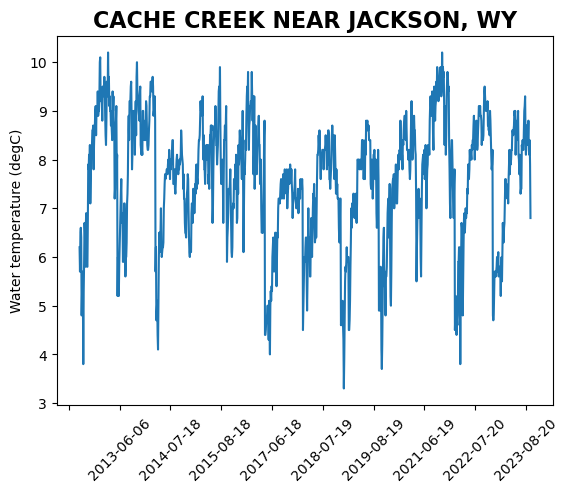

In [10]:
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.ylabel("Water temperature (degC)")

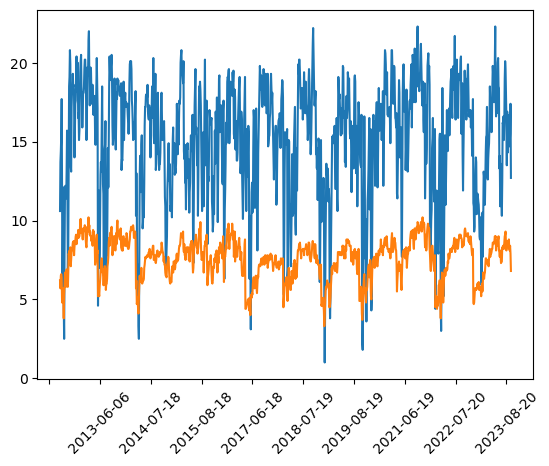

In [11]:
plt.plot(data['Date'] , data[ 'tmean..degrees.C.'] )
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

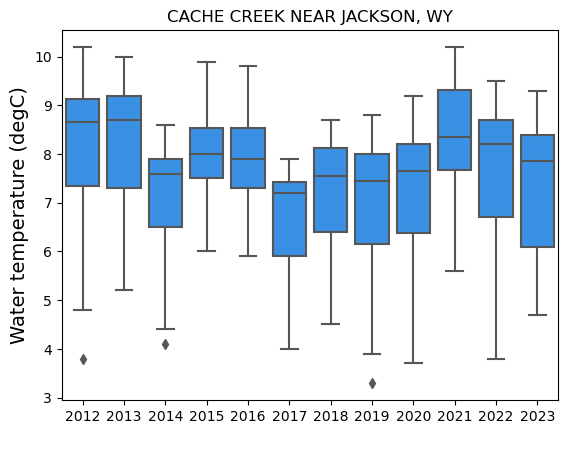

In [12]:
#data.boxplot(column=['X_00010_00003'], by='yr', title=station_nm)

#plt.ylabel("Water temperature (degC)")


import seaborn as sns



ax=sns.boxplot(x="yr", y="X_00010_00003", data=data , color="dodgerblue")
ax.set_ylabel( "Water temperature (degC)" , fontsize=14 #, color="red"
             )
ax.set_xlabel( " " , fontsize=14 #, color="red"
             )
ax.set_title( station_nm)
plt.show()

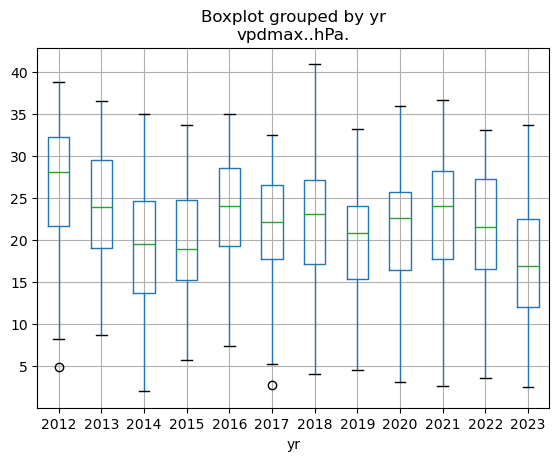

In [13]:
# 'vpdmax..hPa.'
data.boxplot(column=['vpdmax..hPa.'], by='yr')
plt.show()

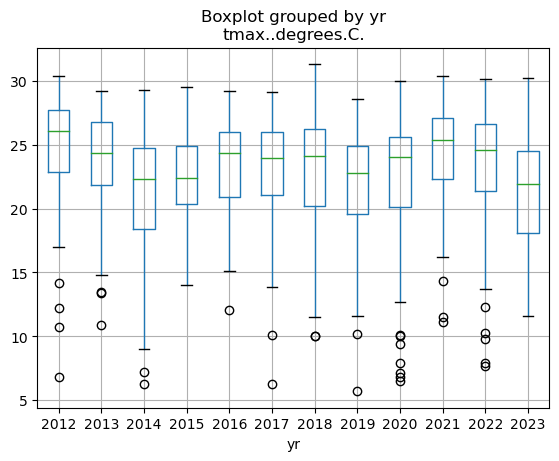

In [14]:
data.boxplot(column=['tmax..degrees.C.'], by='yr')
plt.show()

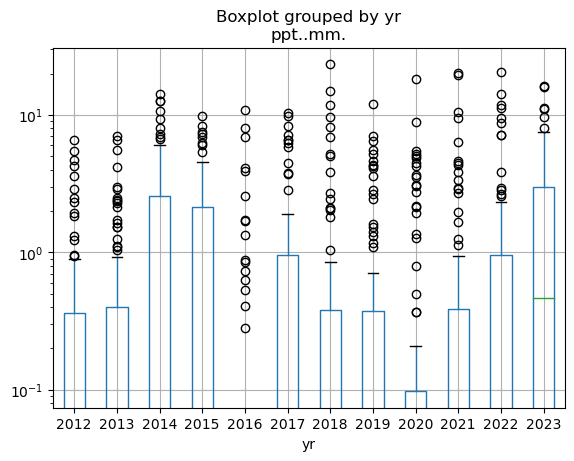

In [15]:
data.boxplot(column=['ppt..mm.'], by='yr')

plt.yscale('log')
plt.show()

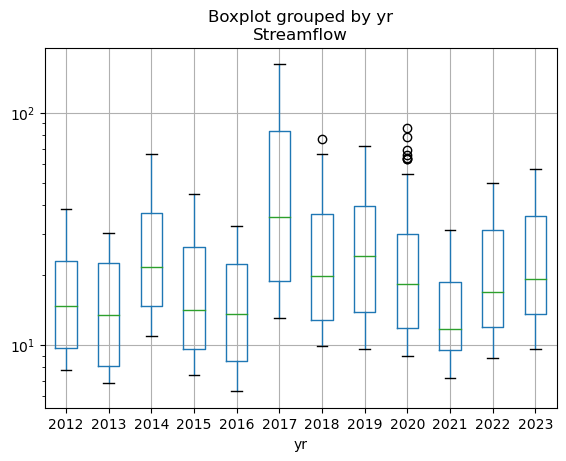

In [16]:
data.boxplot(column=['X_00060_00003'], by='yr')
plt.yscale('log')
plt.title("Streamflow")
plt.show()

In [17]:
data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

,tmax..degrees.C.,X_00010_00001
tmax..degrees.C.,1.000000,0.674252
X_00010_00001,0.674252,1.000000


                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000         -0.119413          -0.290440   
tmin..degrees.C.   -0.119413          1.000000           0.934118   
tmean..degrees.C.  -0.290440          0.934118           1.000000   
tmax..degrees.C.   -0.388938          0.813624           0.967271   
tdmean..degrees.C.  0.399199          0.370752           0.188603   
vpdmin..hPa.       -0.438106          0.606337           0.705202   
vpdmax..hPa.       -0.469434          0.691453           0.879648   
X_00010_00001      -0.279716          0.610733           0.679434   
X_00010_00003      -0.155733          0.775318           0.778542   
X_00060_00003       0.089380         -0.421984          -0.400534   
doy                -0.002752          0.468349           0.408834   
log_Q               0.079425         -0.475502          -0.447929   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -

<Axes: >

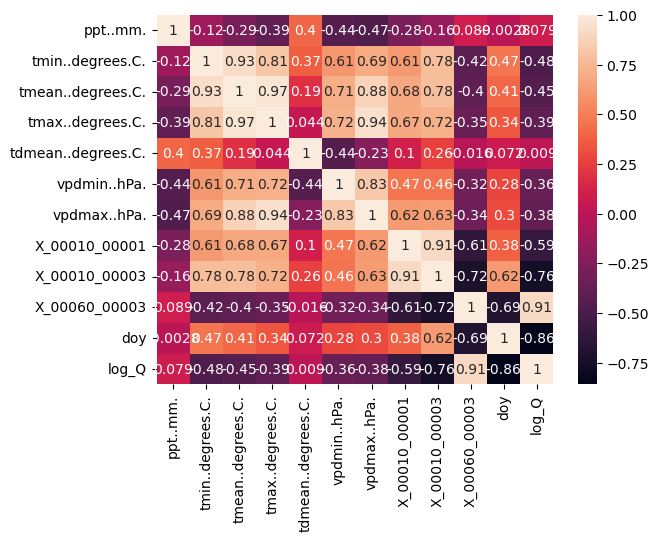

In [18]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
        'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy','log_Q' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
ppt..mm.           1.000000          -0.290440     -0.469434  0.079425
tmean..degrees.C. -0.290440           1.000000      0.879648 -0.447929
vpdmax..hPa.      -0.469434           0.879648      1.000000 -0.380197
log_Q              0.079425          -0.447929     -0.380197  1.000000


<Axes: >

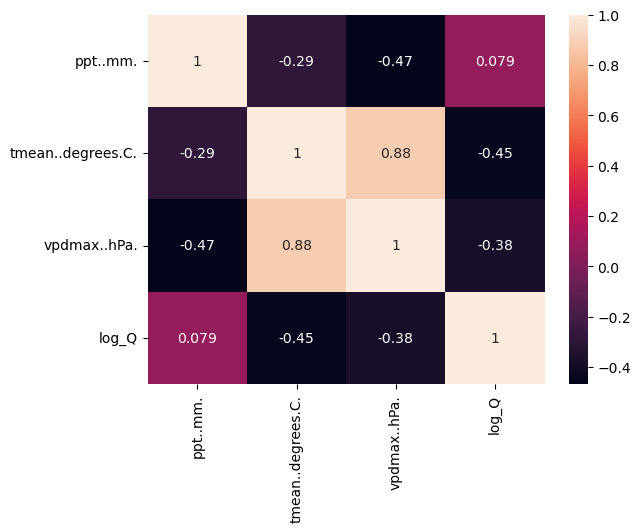

In [19]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.' #, 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
     #  'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
     ,'log_Q'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [20]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_train.columns)

      ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
6         0.00                5.1         10.58  3.517498
788       0.00               20.6         34.81  2.549445
774       0.00               15.7         23.09  2.821379
845       0.00               16.7         23.02  2.791165
661       0.00               15.4         25.53  3.655840
...        ...                ...           ...       ...
330       0.98               15.9         18.50  2.341806
466       0.56               10.5         11.21  4.594109
121       0.00               19.5         31.48  2.980619
1044      0.00               17.2         22.46  3.020425
860       0.00               19.9         29.84  2.501436

[874 rows x 4 columns]
6       5.2
788     8.9
774     8.0
845     8.2
661     7.0
       ... 
330     8.8
466     5.3
121     9.2
1044    7.9
860     9.1
Name: X_00010_00003, Length: 874, dtype: float64
Index(['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q'], dtype='object')


In [21]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]




X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']


['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q', 'yr']
0      6.2
1      5.7
2      6.5
3      6.6
4      6.4
      ... 
812    8.6
813    8.2
814    8.1
815    7.3
816    5.5
Name: X_00010_00003, Length: 817, dtype: float64


In [22]:
print(X_train)

X_train=X_train[[ 'ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']]
X_test= X_test[[ 'ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']]

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q    yr
0        0.38               10.6         13.59  3.456317  2012
1        0.00               13.7         18.69  3.563883  2012
2        0.94               14.4         19.25  3.618993  2012
3        0.00               15.4         21.08  3.653252  2012
4        0.00               17.7         30.95  3.648057  2012
..        ...                ...           ...       ...   ...
812      0.00               16.5         22.32  2.240710  2020
813      0.00               16.4         22.56  2.226783  2020
814      0.37               15.9         23.64  2.214846  2020
815      0.00               16.8         23.57  2.196113  2020
816      0.00               11.7         17.87  2.223542  2020

[817 rows x 5 columns]


0.9008930569332633


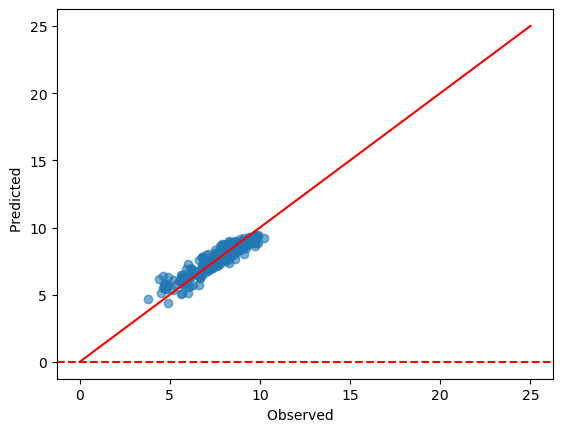

test: 0.9373352692461092
0.3849295087032687


In [23]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [24]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.7102436986614589
test correlation_coefficient: 0.8113314066338723
MSE: 0.6766393511563571
RMS: 0.8406884514887901
max depth: 2
test correlation_coefficient: 0.8193523717394592
test correlation_coefficient: 0.8335466050791437
MSE: 0.6052948173648641
RMS: 0.7671320423235621
max depth: 3
test correlation_coefficient: 0.8795828810158921
test correlation_coefficient: 0.8976163484921147
MSE: 0.48899376158565544
RMS: 0.6209199712598923
max depth: 4
test correlation_coefficient: 0.9035458761799033
test correlation_coefficient: 0.9045015060701521
MSE: 0.4582540461632563
RMS: 0.5892344213337362
max depth: 5
test correlation_coefficient: 0.9206590248706981
test correlation_coefficient: 0.9127726302526541
MSE: 0.42528851008972185
RMS: 0.5535503151626618
max depth: 6
test correlation_coefficient: 0.9346904882146173
test correlation_coefficient: 0.9048506633623038
MSE: 0.4480399400887908
RMS: 0.5731427417135398
max depth: 7
test correlation_coefficient: 0

max depth: 5
correlation_coefficient: 0.9127726302526541
MSE: 0.42528851008972185
RMS: 0.5535503151626618


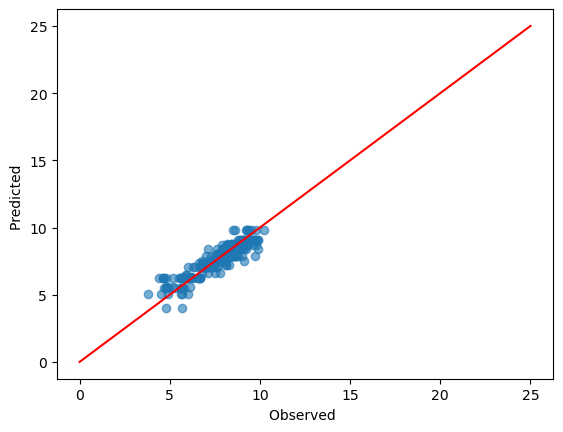

In [25]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [26]:
print(regr.feature_importances_)
print(idv)

[0.01617897 0.25209093 0.00589066 0.72583944]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']


In [27]:
params = {
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [28]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.2935


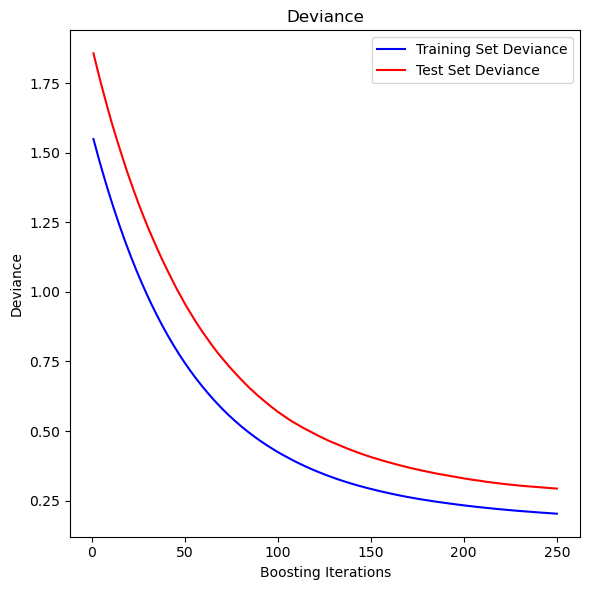

In [29]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

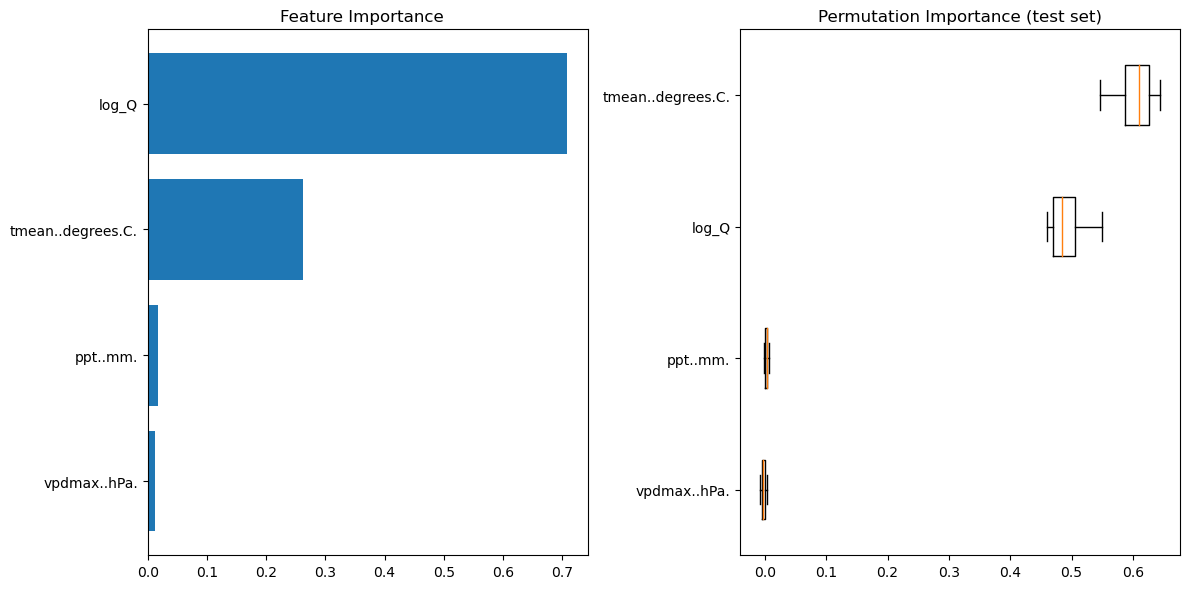

In [30]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [31]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [32]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    
    
    perm_sorted_idx = result.importances_mean.argsort()
    print(perm_sorted_idx)
    print(X.columns[perm_sorted_idx][3])

    
    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax


The plot on the left shows the Gini importance of the model. 

permuting a feature

[2 0 1 3]
log_Q


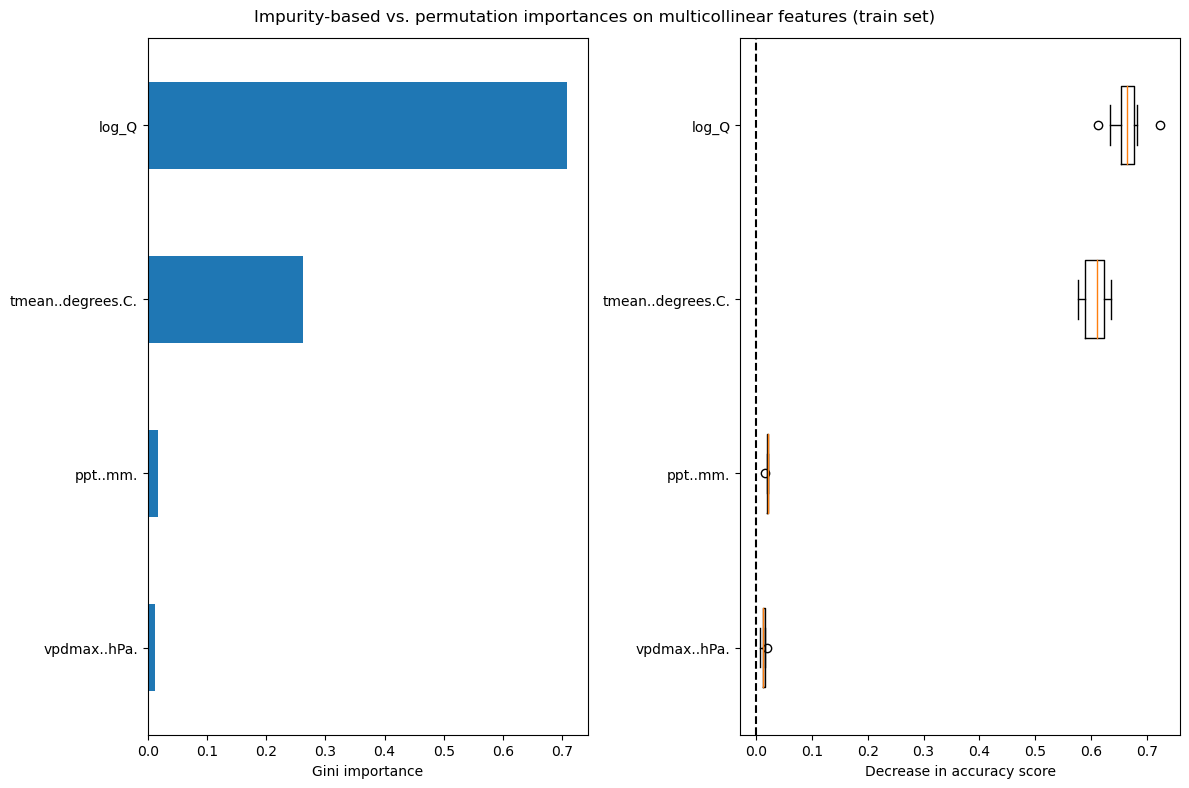

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.9296428088390745
MSE: 0.4174867400836512
RMS: 0.5418571697433843


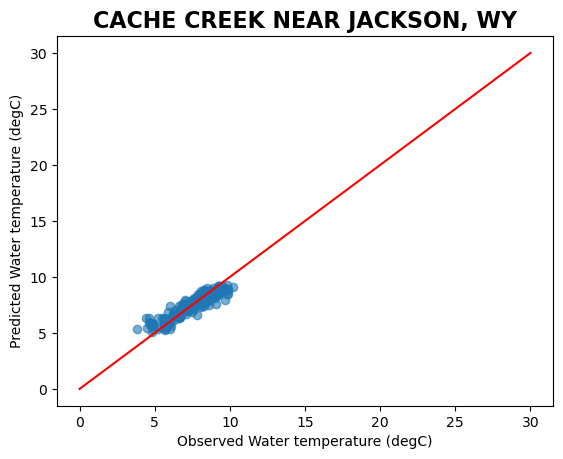

In [34]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed Water temperature (degC)")
plt.ylabel("Predicted Water temperature (degC)")

x = np.linspace(0, 30, 30)
y = x
plt.plot(x, y, color='red')

plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.show()

817     6.2
818     6.7
819     7.0
820     7.2
821     7.4
       ... 
1088    8.2
1089    8.1
1090    8.4
1091    7.9
1092    6.8
Name: X_00010_00003, Length: 276, dtype: float64
[6.43550772 7.05671843 7.20348452 7.5268369  7.54793301 7.54169013
 6.98026249 7.36983463 7.37520567 7.37283643 6.32823979 6.31305438
 7.52880086 8.15445616 8.36882287 8.41154509 8.18626624 7.84007511
 8.02119703 8.14119712 7.40765202 7.63450318 8.24024905 7.96826032
 7.97006568 7.67470814 7.75046611 7.81546098 8.03838064 8.2257162
 8.29183228 8.43984069 8.52580194 8.54989416 8.63641178 8.48939884
 8.39209812 8.74382458 8.82468424 8.71020936 8.47059298 8.73553048
 8.86372475 8.8195294  8.47059298 8.71020936 8.69963236 8.83241155
 8.95055605 8.95055605 9.27202376 8.78231738 9.19302912 8.62181815
 8.73344922 8.83268191 8.9716984  8.87268973 8.95162471 9.15863045
 9.00651769 9.0772023  8.76255517 8.49383859 7.93801522 8.51791622
 8.82527475 7.3775158  7.54643833 8.4917637  7.65699722 7.77541623
 8.49909213 8.89

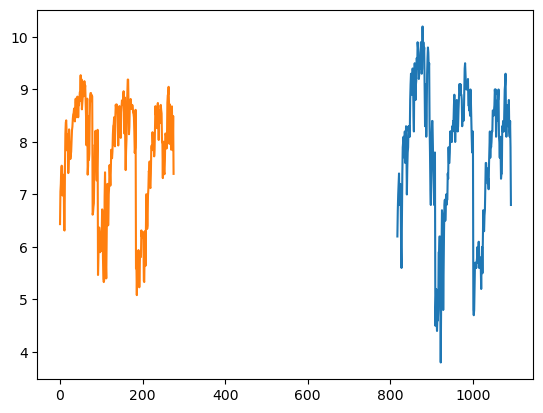

817     2021-06-01
818     2021-06-02
819     2021-06-03
820     2021-06-04
821     2021-06-05
           ...    
1088    2023-08-27
1089    2023-08-28
1090    2023-08-29
1091    2023-08-30
1092    2023-08-31
Name: Date, Length: 276, dtype: object


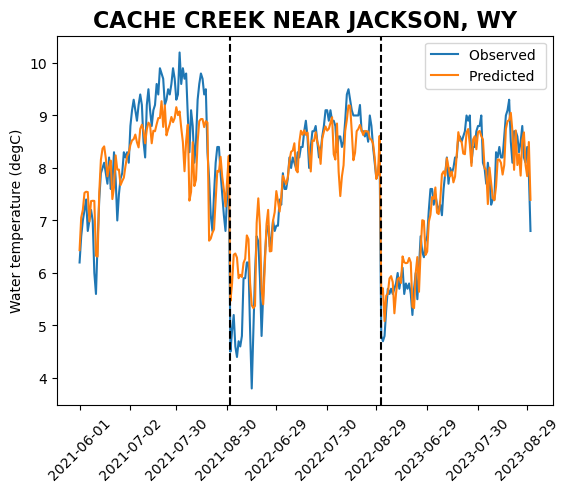

In [35]:



print(y_test)
print(yfit)
print(Y)
plt.plot(y_test)
plt.plot(yfit)
plt.show()

date=data[data['yr']>=2021][  'Date']
print(date)
plt.plot(date,y_test , label='Observed ')

#plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter())  # Formats labels concisely

plt.plot(date,yfit , label='Predicted ')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Display every 10th label
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts for missing dates
plt.axvline(x= "2022-06-01", color='black', linestyle='--')
plt.axvline(x= "2023-06-01", color='black', linestyle='--')
plt.gca().xaxis.set_tick_params(rotation=45 )  # Rotate labels for readability
plt.ylabel("Water temperature (degC)")
#pd.dataframe("date"= ,"y_test"= ,"yfit"=yfit)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.legend()

In [36]:
max_bias=max(yfit-y_test)
max_bias

1.891352518373603

In [37]:
#plt.hist(y_test , alpha=0.5)
#plt.show()

#plt.hist(yfit , alpha=0.5)
#plt.show()

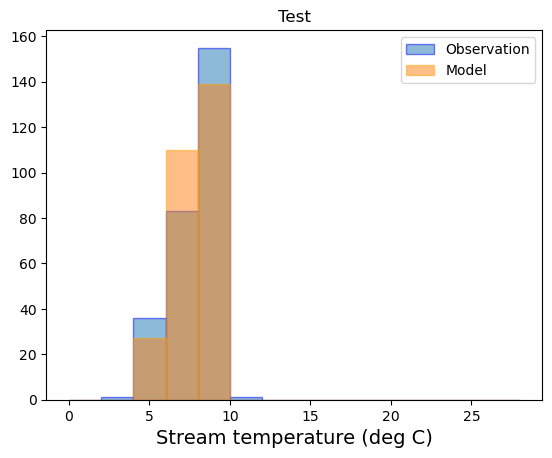

In [38]:
bins = np.arange(10, 25, 2)
bins = np.arange(0, 30, 2)
bars1, _, _ = plt.hist(y_test , alpha=0.5 , label="Observation",bins=bins , edgecolor='blue')
bars2, _, _ = plt.hist(yfit , alpha=0.5, label="Model",bins=bins , edgecolor='orange')
plt.legend(   )
plt.xlabel("Stream temperature (deg C)", fontsize=14 )
plt.title("Test")
plt.show()

In [39]:
#plt.hist(y_test , alpha=0.5)
#plt.hist(yfit , alpha=0.5)

#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["y_test","yfit"])
#plt.legend()

In [40]:
#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["observation","model"])
#plt.legend()
#plt.xlabel("Stream temperature (deg C)", fontsize=14 )
#plt.title("Test")

upper alpha=0.95

correlation_coefficient: 0.9353189143126206
MSE: 0.6781329128415619
RMS: 0.8042033165561688


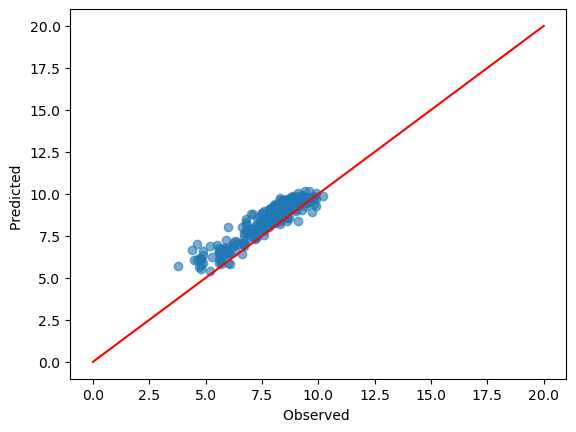

In [41]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

lower upper alpha=0.05

correlation_coefficient: 0.9217788617757087
MSE: 0.896063692284611
RMS: 1.014345689894178


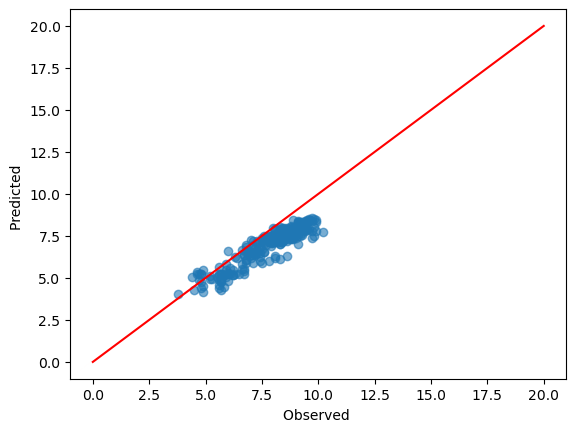

In [42]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.05,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [43]:
params = {"loss": "lad" , #,"huber",
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

correlation_coefficient: 0.9295484550317378
MSE: 0.4176176182929439
RMS: 0.5420356159325703


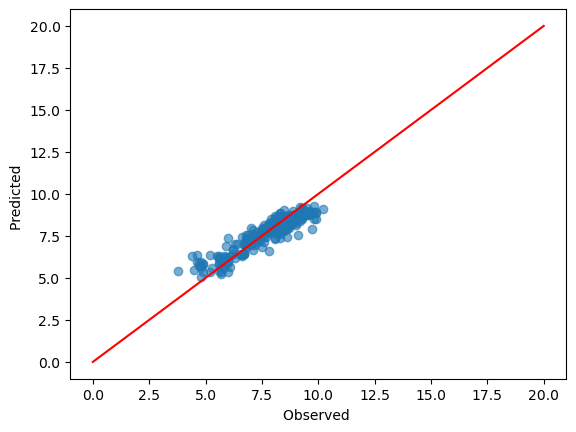

In [44]:
regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [47]:
data = {
    
    "site"  : [ site],
'alt_va': [ alt_va],
    'drain_area_va': [ drain_area_va],
    
"station_nm" :[df3['station_nm'][0]],
    "dec_lat_va":[df3['dec_lat_va'][0]],
    "dec_long_va": [df3['dec_long_va'][0]],
    'max_bias': [max_bias],
        "RMS": [rms],
        "correlation_coefficient": [correlation_coefficient],
    "perm":[perm]
       }
result = pd.DataFrame(data)
print(result)

       site  alt_va  drain_area_va                    station_nm  dec_lat_va  \
0  13018300    6750           10.6  CACHE CREEK NEAR JACKSON, WY   43.452153   

   dec_long_va  max_bias       RMS  correlation_coefficient  \
0  -110.704091  1.891353  0.542036                 0.929548   

                        perm  
0  tmean..degrees.C. & log_Q  


In [48]:
file= "result"+site+".csv"
file
result.to_csv(file)

In [46]:
#perm="tmean..degrees.C."
#perm="log_Q"
#perm="tmean..degrees.C."
perm="tmean..degrees.C. & log_Q"